# Example of simple re-gridding: POC

In [1]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2024-07-01", "2024-07-31")

results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_POC_NRT",
    temporal=tspan,
    granule_name="*.DAY.*.0p1deg.*",
)

paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/31 [00:00<?, ?it/s]

In [5]:
dataset = xr.open_dataset(paths[0])
dataset

<xarray.Dataset> Size: 26MB
Dimensions:  (lat: 1800, lon: 3600, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    poc      (lat, lon) float32 26MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240701.L3m.DAY.POC.V2_0.poc...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/POC/2.0
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         745741
    data_minimum:                      18.199707
    data_maximum:                      1989.1997

In [6]:
poc = np.array(dataset["poc"])

In [7]:
print(poc.shape)

(1800, 3600)


In [8]:
print(poc[1,1])

nan


In [9]:
poc_10lat = np.reshape(poc, (180, 10, 3600))

In [10]:
poc_latregrid = np.nanmean(poc_10lat, axis=1)

/tmp/ipykernel_1847/4091360230.py:1: RuntimeWarning: Mean of empty slice
  poc_latregrid = np.nanmean(poc_10lat, axis=1)


In [11]:
poc_latregrid_10lon = np.reshape(poc_latregrid, (180, 360, 10))

In [12]:
poc_latregrid_lonregrid = np.nanmean(poc_latregrid_10lon, axis=2)

/tmp/ipykernel_1847/1374962890.py:1: RuntimeWarning: Mean of empty slice
  poc_latregrid_lonregrid = np.nanmean(poc_latregrid_10lon, axis=2)


In [13]:
print(poc_latregrid_lonregrid.shape)

(180, 360)


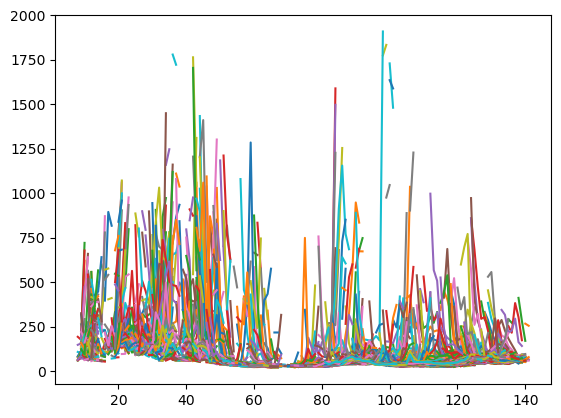

In [16]:
p = plt.plot(poc_latregrid_lonregrid);